In [1]:
# created this from the chicago dataset information
import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofchicago.org", "tfoqsIhnFlDq4L73gLxM6Zuvy")

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofchicago.org,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get_all("85ca-t3if")
results2 = client.get_all("68nd-jvt3")
results3 = client.get_all("u6pd-qa9d")

# results_df_Crashes = pd.DataFrame.from_records(results)
# results_df_Vehicles = pd.DataFrame.from_records(results2)
# results_df_People = pd.DataFrame.from_records(results3)


In [2]:
results_df_Crashes = pd.read_csv('Crashes-Crashes.csv')
results_df_People = pd.read_csv('Crashes-People.csv')
results_df_Vehicles = pd.read_csv('Crashes-Vehicles.csv')

/var/folders/rx/c264lbnd6ws42tkcmdqfl9y80000gn/T/ipykernel_76464/147782472.py:2: DtypeWarning: Columns (20,24,25,26,29) have mixed types. Specify dtype option on import or set low_memory=False.
  results_df_People = pd.read_csv('Crashes-People.csv')
/var/folders/rx/c264lbnd6ws42tkcmdqfl9y80000gn/T/ipykernel_76464/147782472.py:3: DtypeWarning: Columns (19,21,40,41,42,44,48,49,50,53,55,58,59,61,71) have mixed types. Specify dtype option on import or set low_memory=False.
  results_df_Vehicles = pd.read_csv('Crashes-Vehicles.csv')


In [3]:
# describe all the data of Crashes
results_df_Crashes.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,777963.00000,1.990060e+05,777963.000000,777958.000000,777963.000000,776261.000000,776261.000000,776261.000000,776261.000000,776261.000000,776261.000000,776261.0,777963.000000,777963.000000,777963.000000,772754.000000,772754.000000
mean,28.39675,1.333032e+01,3685.876596,1242.611790,2.034768,0.188728,0.001192,0.020112,0.106704,0.060721,2.004795,0.0,13.206010,4.123227,6.691210,41.854814,-87.673513
std,6.19297,2.961623e+03,2888.513769,705.382248,0.452365,0.564495,0.037436,0.166067,0.421350,0.317084,1.159561,0.0,5.565678,1.980436,3.366798,0.334214,0.679025
min,0.00000,0.000000e+00,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.936193
25%,30.00000,2.000000e+00,1245.000000,714.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.782364,-87.721645
50%,30.00000,2.000000e+00,3200.000000,1211.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.874687,-87.674044
75%,30.00000,4.000000e+00,5600.000000,1822.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.000000,41.924284,-87.633266
max,99.00000,1.191625e+06,451100.000000,6100.000000,18.000000,21.000000,4.000000,10.000000,21.000000,15.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000


In [18]:
results_df_Crashes.columns

results_df_Crashes

<class 'pandas.core.frame.DataFrame'>
Index: 772754 entries, 2 to 777962
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                772754 non-null  object 
 1   RD_NO                          768210 non-null  object 
 2   CRASH_DATE_EST_I               58108 non-null   object 
 3   CRASH_DATE                     772754 non-null  object 
 4   POSTED_SPEED_LIMIT             772754 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         772754 non-null  object 
 6   DEVICE_CONDITION               772754 non-null  object 
 7   WEATHER_CONDITION              772754 non-null  object 
 8   LIGHTING_CONDITION             772754 non-null  object 
 9   FIRST_CRASH_TYPE               772754 non-null  object 
 10  TRAFFICWAY_TYPE                772754 non-null  object 
 11  LANE_CNT                       198106 non-null  float64
 12  ALIGNMENT                      7727

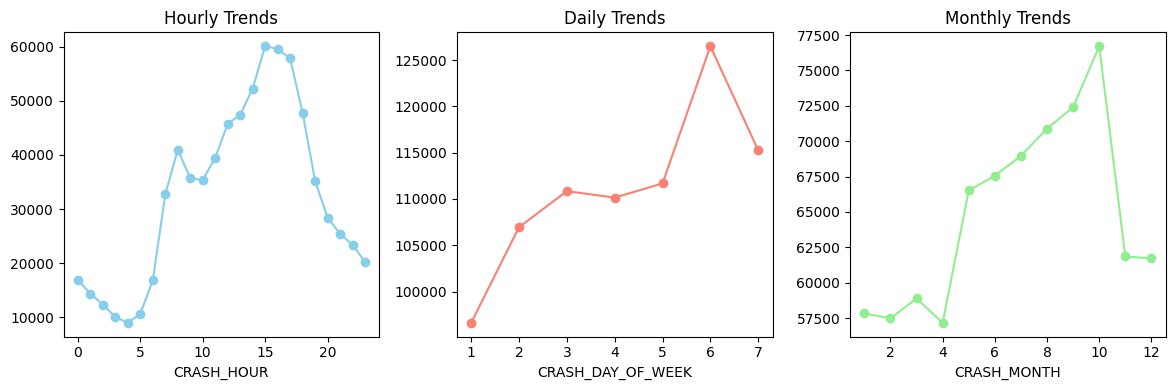

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

data = results_df_Crashes

# Create line plots for temporal trends
hourly_trends = data.groupby('CRASH_HOUR').size()
daily_trends = data.groupby('CRASH_DAY_OF_WEEK').size()
monthly_trends = data.groupby('CRASH_MONTH').size()

plt.figure(figsize=(12, 4))
plt.subplot(131)
hourly_trends.plot(kind='line', marker='o', color='skyblue')
plt.title('Hourly Trends')

plt.subplot(132)
daily_trends.plot(kind='line', marker='o', color='salmon')
plt.title('Daily Trends')

plt.subplot(133)
monthly_trends.plot(kind='line', marker='o', color='lightgreen')
plt.title('Monthly Trends')

plt.tight_layout()
plt.show()


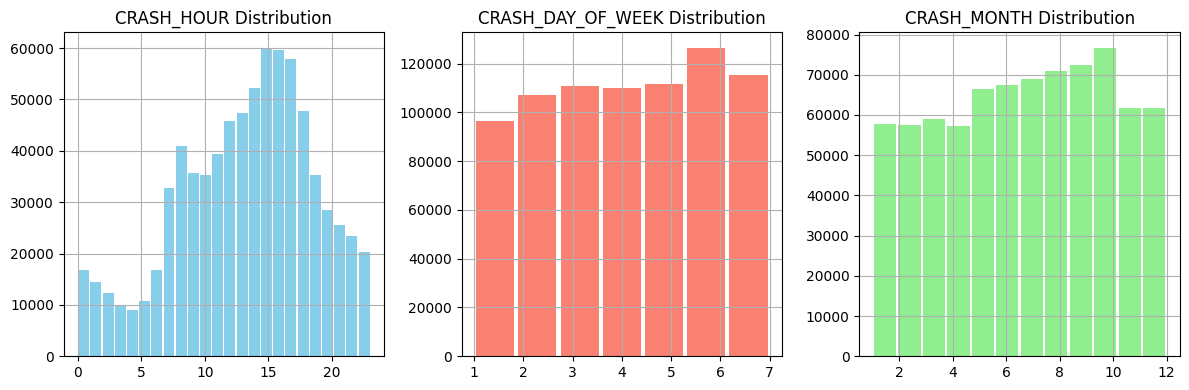

In [6]:
import matplotlib.pyplot as plt

# Create histograms
plt.figure(figsize=(12, 4))
plt.subplot(131)
data['CRASH_HOUR'].hist(rwidth=0.9, bins=24, color='skyblue')
plt.title('CRASH_HOUR Distribution')

plt.subplot(132)
data['CRASH_DAY_OF_WEEK'].hist(rwidth=0.9, bins=7, color='salmon')
plt.title('CRASH_DAY_OF_WEEK Distribution')

plt.subplot(133)
data['CRASH_MONTH'].hist(rwidth=0.9, bins=12, color='lightgreen')
plt.title('CRASH_MONTH Distribution')

plt.tight_layout()
plt.show()


In [7]:
import pandas as pd
import folium
from folium.plugins import HeatMap
from IPython.display import display


results_df_Crashes = results_df_Crashes.dropna(subset=['LATITUDE', 'LONGITUDE'])


# Create a Folium Map centered around a specific location (e.g., average latitude and longitude)
map_center = [results_df_Crashes['LATITUDE'].mean(), results_df_Crashes['LONGITUDE'].mean()]
heatmap_map = folium.Map(location=map_center, zoom_start=10)



# Create a list of coordinates from the cleaned data while checking against the threshold
heat_data = []
latitude_dict = {}
longitude_dict = {}

for index, row in results_df_Crashes.iterrows():
    latitude, longitude = row['LATITUDE'], row['LONGITUDE']
    if latitude not in latitude_dict:
        latitude_dict[latitude] = 1
    else: 
        latitude_dict[latitude] += 1
    if longitude not in longitude_dict:
        longitude_dict[longitude] = 1
    else: 
        longitude_dict[longitude] += 1
    if latitude_dict[latitude] < 100 and longitude_dict[longitude] < 100:
        heat_data.append([latitude, longitude])
    else:
        break  # Stop recording once the threshold is exceeded

if heat_data:
    # Calculate the map center based on the heatmap data
    map_center = [sum(coord[0] for coord in heat_data) / len(heat_data), sum(coord[1] for coord in heat_data) / len(heat_data)]

    # Create a map centered on the heatmap data
    heatmap_map = folium.Map(location=map_center, zoom_start=10)

    # Add a HeatMap layer to the map
    HeatMap(heat_data).add_to(heatmap_map)

    # Display the heatmap in the cell output
    display(heatmap_map)
else:
    print("No heatmap data to display.")


/var/folders/rx/c264lbnd6ws42tkcmdqfl9y80000gn/T/ipykernel_76464/4009387975.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x='WEATHER_CONDITION', y='INJURIES_FATAL', data=grouped_data, palette="viridis")
/var/folders/rx/c264lbnd6ws42tkcmdqfl9y80000gn/T/ipykernel_76464/4009387975.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45)


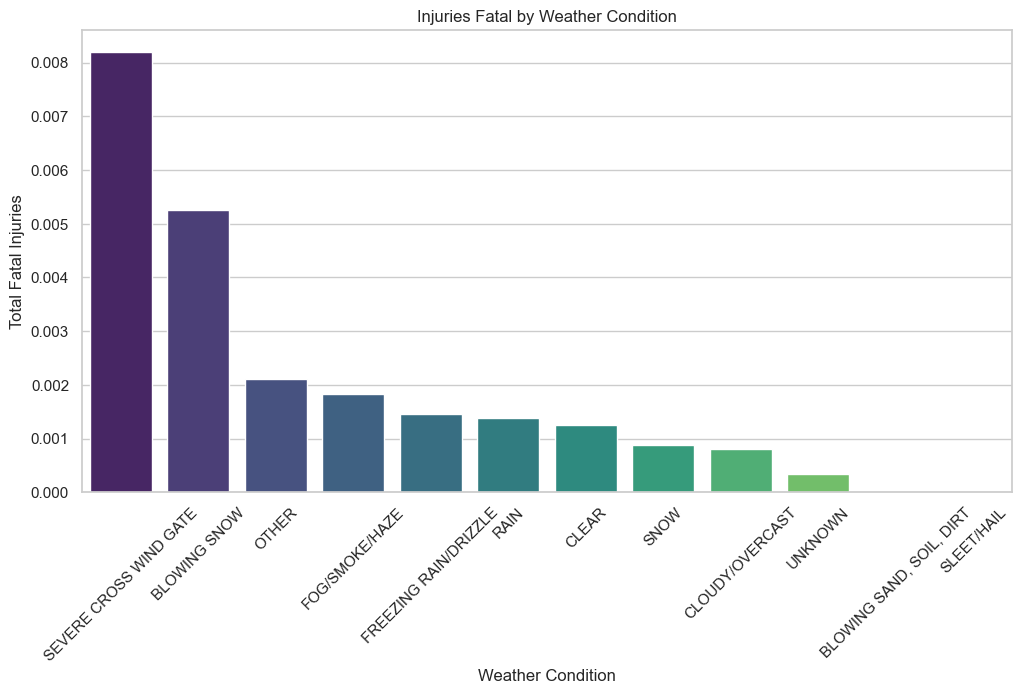

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset
data = results_df_Crashes

columns_of_interest = ['WEATHER_CONDITION', 'INJURIES_FATAL']

data = data.dropna(subset=columns_of_interest)

plt.figure(figsize=(12, 6))

grouped_data = data.groupby('WEATHER_CONDITION')['INJURIES_FATAL'].mean().reset_index()
grouped_data = grouped_data.sort_values(by='INJURIES_FATAL', ascending=False)

sns.set(style="whitegrid")
g = sns.barplot(x='WEATHER_CONDITION', y='INJURIES_FATAL', data=grouped_data, palette="viridis")
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.title('Injuries Fatal by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Total Fatal Injuries')

plt.show()


<Figure size 1200x600 with 0 Axes>

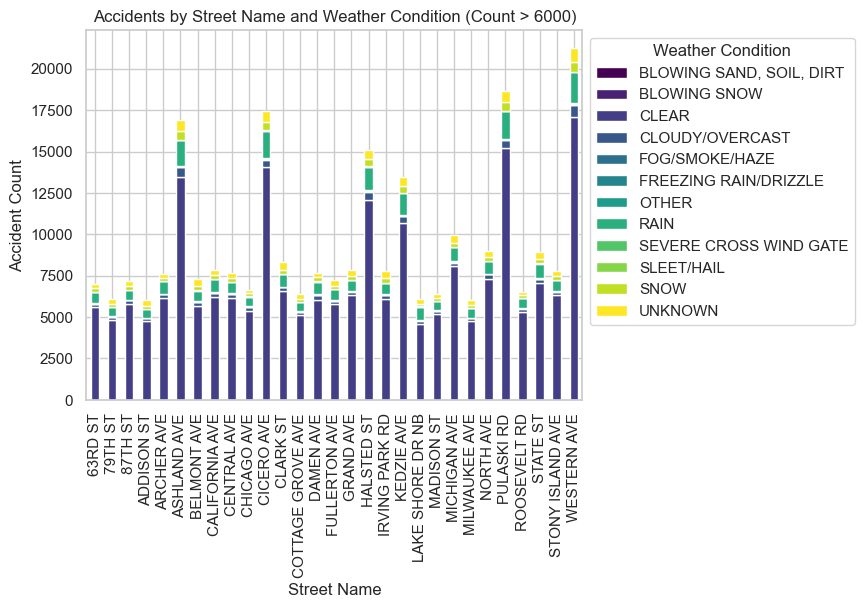

<Figure size 1200x600 with 0 Axes>

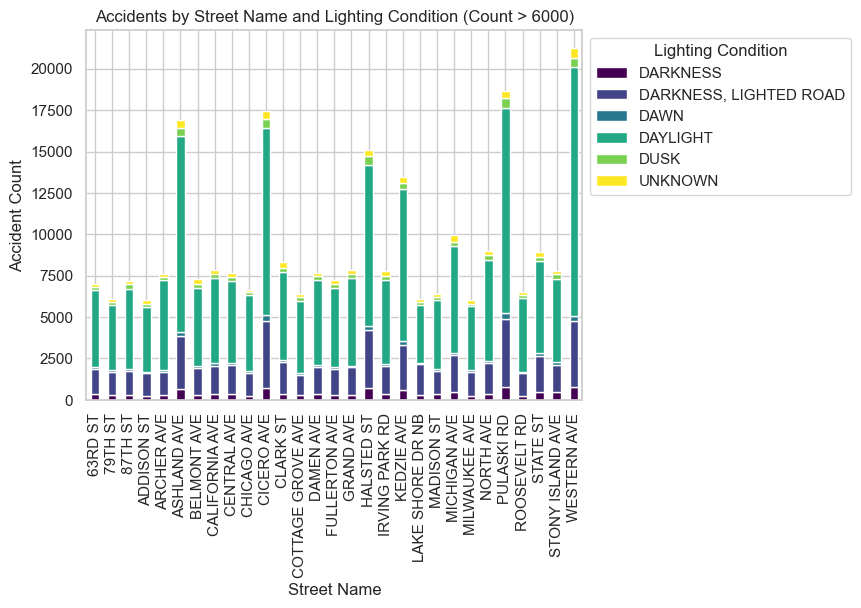

In [9]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = results_df_Crashes

columns_of_interest = ['STREET_NAME', 'WEATHER_CONDITION', 'LIGHTING_CONDITION']

data = data.dropna(subset=columns_of_interest)

grouped_data_weather = data.groupby(['STREET_NAME', 'WEATHER_CONDITION']).size().unstack().fillna(0)

grouped_data_weather = grouped_data_weather[grouped_data_weather.sum(axis=1) > 6000]

bar_width = 0.7  
bar_spacing = 0.7 
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
g = grouped_data_weather.plot(kind='bar', stacked=True, colormap='viridis')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Accidents by Street Name and Weather Condition (Count > 6000)')
plt.xlabel('Street Name')
plt.ylabel('Accident Count')
plt.legend(title='Weather Condition', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

grouped_data_lighting = data.groupby(['STREET_NAME', 'LIGHTING_CONDITION']).size().unstack().fillna(0)

grouped_data_lighting = grouped_data_lighting[grouped_data_lighting.sum(axis=1) > 6000]

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
g = grouped_data_lighting.plot(kind='bar', stacked=True, colormap='viridis')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Accidents by Street Name and Lighting Condition (Count > 6000)')
plt.xlabel('Street Name')
plt.ylabel('Accident Count')
plt.legend(title='Lighting Condition',  loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


In [10]:
Crashes_data = results_df_Crashes
Crashes_data.drop(Crashes_data.columns[[1, 2, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 46, 47, 48]], axis=1)


,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,CRASH_TYPE,PRIM_CONTRIBUTORY_CAUSE,INJURIES_TOTAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,NO INJURY / DRIVE AWAY,FAILING TO REDUCE SPEED TO AVOID CRASH,0.0,14,7,7
18,fd05285e9d273fe20cbbebf84794045828a2ba589073b6...,07/29/2023 02:30:00 PM,10,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,UNABLE TO DETERMINE,0.0,14,7,7
19,fda2491d33ac819033f4aaa7ed901120f2f6785b7e5bbb...,07/29/2023 12:50:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DARKNESS,NO INJURY / DRIVE AWAY,UNABLE TO DETERMINE,0.0,0,7,7
27,4a1f7a24129e5e1d4a7a2fd44ab6f8822a20bcdb2f627f...,08/13/2023 10:10:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,NO INJURY / DRIVE AWAY,UNABLE TO DETERMINE,0.0,10,1,8
28,1ee2180a89cc02c0b756f95b5b2755bb5cc9d93450f5ca...,08/09/2023 07:55:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING IMPROPERLY,CLEAR,DAYLIGHT,INJURY AND / OR TOW DUE TO CRASH,UNABLE TO DETERMINE,5.0,19,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
777958,7100975b248ca3a09078c78c90cecf6ccd6be4a7915952...,10/17/2023 11:58:00 AM,25,NO CONTROLS,NO CONTROLS,UNKNOWN,DAYLIGHT,NO INJURY / DRIVE AWAY,UNABLE TO DETERMINE,0.0,11,3,10
777959,7cb67bfcb4d68e0dd48367a2ff938e3242923c835e8f05...,10/18/2023 11:50:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,NO INJURY / DRIVE AWAY,UNABLE TO DETERMINE,0.0,11,4,10
777960,edd2f774156e1119f03dda4a5036475f77faee775f27e7...,10/16/2023 11:00:00 AM,5,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,NO INJURY / DRIVE AWAY,UNABLE TO DETERMINE,0.0,11,2,10
777961,4d25e7ff14d3acd319b6d1be86130619ea04cd92e6fc20...,10/19/2023 01:00:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,INJURY AND / OR TOW DUE TO CRASH,IMPROPER TURNING/NO SIGNAL,1.0,13,5,10


In [11]:
from sklearn.preprocessing import LabelEncoder

text_col = ['TRAFFIC_CONTROL_DEVICE','DEVICE_CONDITION','WEATHER_CONDITION','LIGHTING_CONDITION','CRASH_TYPE','PRIM_CONTRIBUTORY_CAUSE','INJURIES_TOTAL']
c_data = pd.DataFrame()
for col in text_col:
    encoder = LabelEncoder()
    c_data[col] = encoder.fit_transform(Crashes_data[col])

col = ['CRASH_DATE',
 'POSTED_SPEED_LIMIT',
 'CRASH_HOUR',
 'CRASH_DAY_OF_WEEK',
 'CRASH_MONTH']
cn_data = pd.DataFrame(Crashes_data[col])

df = pd.merge(c_data, cn_data, left_index=True, right_index=True)
df.dropna
df

,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,CRASH_TYPE,PRIM_CONTRIBUTORY_CAUSE,INJURIES_TOTAL,CRASH_DATE,POSTED_SPEED_LIMIT,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
2,16,1,2,0,1,36,0,07/29/2023 02:45:00 PM,30,14,7,7
18,17,6,11,5,1,36,0,07/29/2023 02:30:00 PM,10,14,7,7
19,4,3,2,3,1,21,0,07/29/2023 12:50:00 AM,30,0,7,7
27,4,3,2,3,1,23,0,08/13/2023 10:10:00 AM,30,10,1,8
28,4,3,7,3,0,39,1,08/09/2023 07:55:00 PM,30,19,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...
772749,4,3,11,3,1,36,0,07/29/2023 08:00:00 AM,30,8,7,7
772750,4,3,2,3,1,36,0,03/18/2019 06:28:00 AM,30,6,2,3
772751,4,3,2,3,1,36,0,12/28/2021 02:30:00 AM,30,2,3,12
772752,16,1,2,3,0,24,1,02/11/2019 10:15:00 AM,30,10,2,2


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = df.drop('CRASH_DATE', axis=1)
y = df['PRIM_CONTRIBUTORY_CAUSE']
X = df.drop('PRIM_CONTRIBUTORY_CAUSE', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
# we have used 3 models in our project

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Define models
models = [
    ('Logistic Regression', LogisticRegression(solver='liblinear', random_state=0)),
    ('Decision Tree', DecisionTreeClassifier(random_state=1, max_depth=5)),
    ('Random Forest', RandomForestClassifier(random_state=1, max_depth=5)),
]

trained_model = {}

for model_name, model in models:
    clf = model.fit(X_train_scaled, y_train)
    trained_model[model_name] = clf
    y_train_pred = clf.predict(X_train_scaled)
    y_test_pred = clf.predict(X_test_scaled)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f'{model_name} - Accuracy Score Train: {train_accuracy}')
    print(f'{model_name} - Accuracy Score Test: {test_accuracy}')


Logistic Regression - Accuracy Score Train: 0.38785302427385043
Logistic Regression - Accuracy Score Test: 0.3877776137163107
Decision Tree - Accuracy Score Train: 0.3920984354701221
Decision Tree - Accuracy Score Test: 0.3920683036140811
Random Forest - Accuracy Score Train: 0.39212821476829846
Random Forest - Accuracy Score Test: 0.39208133202470186


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
le = LabelEncoder()

data = results_df_Crashes

# Data Preprocessing

# Drop unnecessary columns
data = data.drop(columns=['CRASH_RECORD_ID', 'RD_NO', 'DATE_POLICE_NOTIFIED', 'LOCATION'])

# Feature engineering and encoding categorical variables
categorical_columns = [
    'TRAFFIC_CONTROL_DEVICE',
    'DEVICE_CONDITION',
    'WEATHER_CONDITION',
    'LIGHTING_CONDITION',
    'FIRST_CRASH_TYPE',
    'TRAFFICWAY_TYPE',
    'ALIGNMENT',
    'ROADWAY_SURFACE_COND',
    'ROAD_DEFECT',
    'REPORT_TYPE',
    'INTERSECTION_RELATED_I',
    'NOT_RIGHT_OF_WAY_I',
    'HIT_AND_RUN_I',
    'DAMAGE',
    'PRIM_CONTRIBUTORY_CAUSE',
    'SEC_CONTRIBUTORY_CAUSE',
    'STREET_DIRECTION',
    'STREET_NAME',
    'STATEMENTS_TAKEN_I',
    'DOORING_I',
    'WORK_ZONE_I',
    'WORK_ZONE_TYPE',
    'WORKERS_PRESENT_I',
    'MOST_SEVERE_INJURY',
]

data = data[categorical_columns + ['CRASH_TYPE']]
y = data['CRASH_TYPE']

for col in categorical_columns:
    data = pd.concat([data, pd.get_dummies(data[col], prefix=col, drop_first=True)], axis=1)
    data = data.drop(columns=[col])

# Split the dataset into features and target
X = data.drop(columns=['CRASH_TYPE'])


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (if necessary)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model selection and tuning
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(report)


Accuracy: 0.90
                                  precision    recall  f1-score   support

INJURY AND / OR TOW DUE TO CRASH       0.85      0.74      0.79     41197
          NO INJURY / DRIVE AWAY       0.91      0.95      0.93    113354

                        accuracy                           0.90    154551
                       macro avg       0.88      0.85      0.86    154551
                    weighted avg       0.89      0.90      0.89    154551



/var/folders/rx/c264lbnd6ws42tkcmdqfl9y80000gn/T/ipykernel_76464/2786535634.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
/var/folders/rx/c264lbnd6ws42tkcmdqfl9y80000gn/T/ipykernel_76464/2786535634.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
/var/folders/rx/c264lbnd6ws42tkcmdqfl9y80000gn/T/ipykernel_76464/2786535634.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

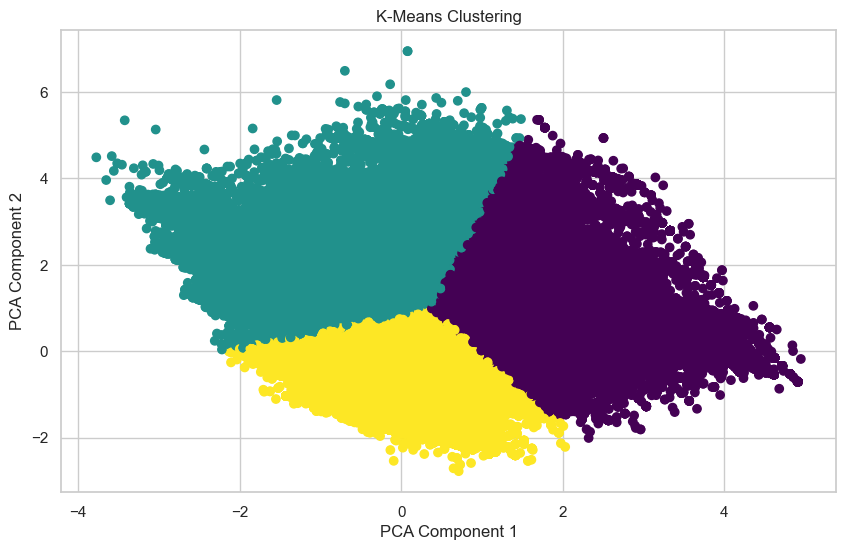

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
data = results_df_Crashes

# Data Preprocessing

features = [
    'DEVICE_CONDITION',
    'WEATHER_CONDITION',
    'LIGHTING_CONDITION',
    'POSTED_SPEED_LIMIT',
    'PRIM_CONTRIBUTORY_CAUSE',
    'ROADWAY_SURFACE_COND',
    'MOST_SEVERE_INJURY',
    'CRASH_TYPE',
]

# Extract the selected features
X = data[features]

# Preprocess categorical features with Label Encoding
categorical_cols = ['CRASH_TYPE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'PRIM_CONTRIBUTORY_CAUSE', 'ROADWAY_SURFACE_COND', 'MOST_SEVERE_INJURY']
le = LabelEncoder()

for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42) 
labels = kmeans.fit_predict(X_pca)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering')
plt.show()



In [30]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
data = results_df_Crashes

# Select the features for clustering
features = [
    'DEVICE_CONDITION',
    'WEATHER_CONDITION',
    'LIGHTING_CONDITION',
    'POSTED_SPEED_LIMIT',
    'PRIM_CONTRIBUTORY_CAUSE',
    'ROADWAY_SURFACE_COND',
    'MOST_SEVERE_INJURY',
    'CRASH_TYPE',
]

# Extract the selected features
X = data[features]

# Preprocess categorical features with Label Encoding
categorical_cols = ['CRASH_TYPE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'PRIM_CONTRIBUTORY_CAUSE', 'ROADWAY_SURFACE_COND', 'MOST_SEVERE_INJURY']
le = LabelEncoder()

for col in categorical_cols:
    X[col] = le.fit_transform(X[col])


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create and fit the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust the parameters as needed
dbscan.fit(X_scaled)



# Get the cluster labels
cluster_labels = dbscan.labels_

# Reduce dimensionality with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a scatter plot to visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


/var/folders/rx/c264lbnd6ws42tkcmdqfl9y80000gn/T/ipykernel_76464/3912729453.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
/var/folders/rx/c264lbnd6ws42tkcmdqfl9y80000gn/T/ipykernel_76464/3912729453.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
/var/folders/rx/c264lbnd6ws42tkcmdqfl9y80000gn/T/ipykernel_76464/3912729453.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

: 